In this notebook, I will use Academic Performance dataset that is available at https://www.kaggle.com/aljarah/xAPI-Edu-Data to perform logistic regression. We will plot the important features so it can be used in our app 'Learn with Chucky' accordingly.

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from xgboost import XGBClassifier, plot_importance

Now we will import the dataset.

In [2]:
dataset = pd.read_csv(r'C:\Users\92320\Downloads\Compressed\archive\xAPI-Edu-Data.csv')

Now we will be visualising features with our target variable 'Class' to get a rough estimate of which feature is the most important.

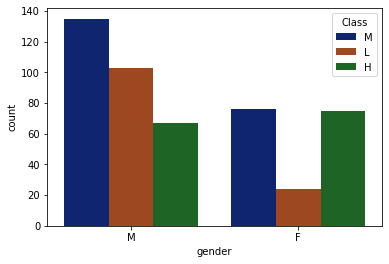

In [5]:
sns.countplot(x='gender',data = dataset, hue='Class',palette='dark')
plt.show()

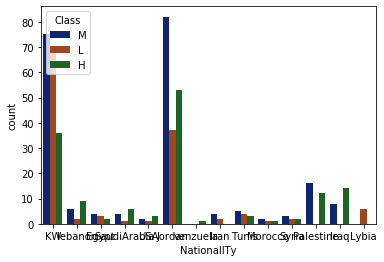

In [4]:
sns.countplot(x='NationalITy',data = dataset, hue='Class',palette='dark')
plt.show()

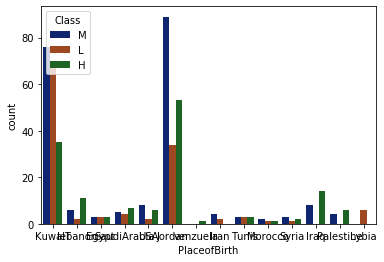

In [7]:
sns.countplot(x='PlaceofBirth',data = dataset, hue='Class',palette='dark')
plt.show()

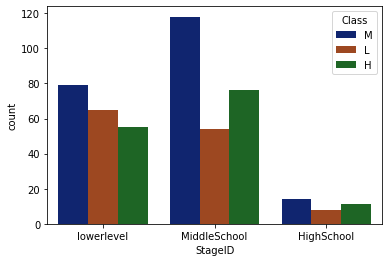

In [8]:
sns.countplot(x='StageID',data = dataset, hue='Class',palette='dark')
plt.show()

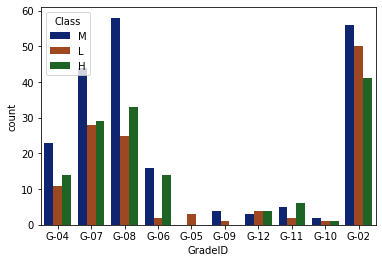

In [9]:
sns.countplot(x='GradeID',data = dataset, hue='Class',palette='dark')
plt.show()

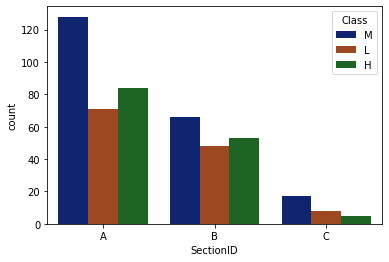

In [10]:
sns.countplot(x='SectionID',data = dataset, hue='Class',palette='dark')
plt.show()

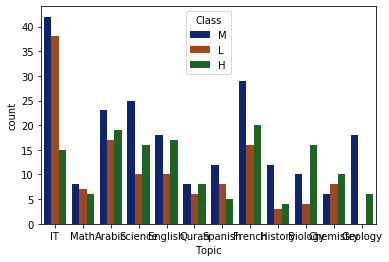

In [11]:
sns.countplot(x='Topic',data = dataset, hue='Class',palette='dark')
plt.show()

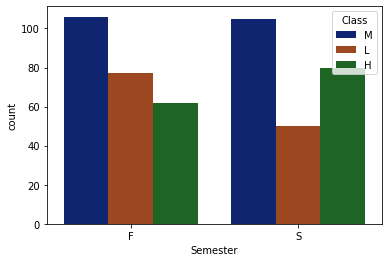

In [13]:
sns.countplot(x='Semester',data = dataset, hue='Class',palette='dark')
plt.show()

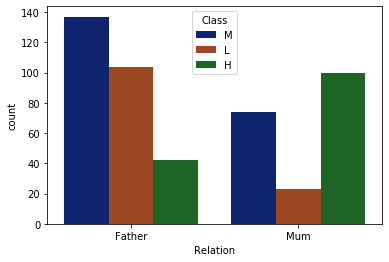

In [14]:
sns.countplot(x='Relation',data = dataset, hue='Class',palette='dark')
plt.show()

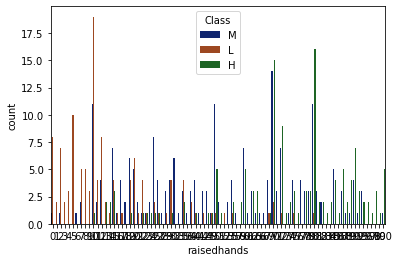

In [15]:
sns.countplot(x='raisedhands',data = dataset, hue='Class',palette='dark')
plt.show()

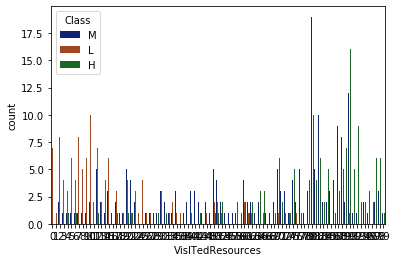

In [17]:
sns.countplot(x='VisITedResources',data = dataset, hue='Class',palette='dark')
plt.show()

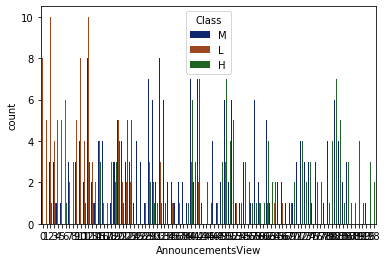

In [18]:
sns.countplot(x='AnnouncementsView',data = dataset, hue='Class',palette='dark')
plt.show()

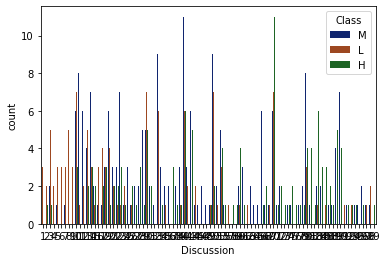

In [20]:
sns.countplot(x='Discussion',data = dataset, hue='Class',palette='dark')
plt.show()

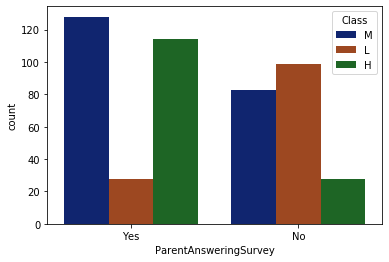

In [21]:
sns.countplot(x='ParentAnsweringSurvey',data = dataset, hue='Class',palette='dark')
plt.show()

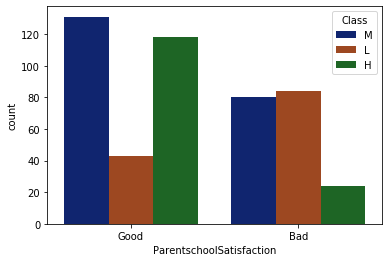

In [22]:
sns.countplot(x='ParentschoolSatisfaction',data = dataset, hue='Class',palette='dark')
plt.show()

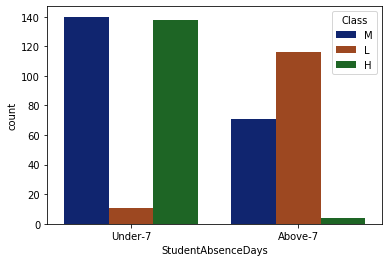

In [23]:
sns.countplot(x='StudentAbsenceDays',data = dataset, hue='Class',palette='dark')
plt.show()

From the above plots, we have a *rough* idea of how these features are related. We can see that **Student Absence Days, Parent School Satisfaction, raised hands, etc.** play a significant role. Later on, we will use XGBClassifier to estimate the most important features side by side and in a much more elegant and numeric way. 
For now, we'll prepare our data for our logistic regression model. 

Since we already know that our target variable is *'Class'*, we will set it as our target and set the rest of our dataset as X. 

In [24]:
x = dataset.drop('Class', axis=1)
y = dataset['Class']

Our dataset has no missing values, hence there's no need for imputing anything in here. But we need to encode values as most of them are not numeric and our algorithm requires it.

In [26]:
#Encoding data
label = LabelEncoder()

col = x.dtypes.pipe(lambda x: x[x=='object']).index

for c in col:
    x[c]=label.fit_transform(x[c])

Since we are using a supervised algorithm, we'll be splitting our dataset into train and test using sklearn.

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=52)

Since our data is ready now, we'll be using it to fit into our logistic regression model!

In [28]:
logistic = LogisticRegression(max_iter=4000)
logistic.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=4000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Now let's predict this and check the accuracy score.

In [29]:
predict = logistic.predict(x_test)
accuracy = accuracy_score(y_test, predict)
print("Accuracy:", accuracy*100, "%")

Accuracy: 82.29166666666666 %


Our accuracy score is really good! Now let's generate a classification report.

In [30]:
report = classification_report(y_test, predict)
print(report)

              precision    recall  f1-score   support

           H       0.87      0.77      0.82        35
           L       0.81      0.95      0.88        22
           M       0.79      0.79      0.79        39

    accuracy                           0.82        96
   macro avg       0.82      0.84      0.83        96
weighted avg       0.83      0.82      0.82        96



Technically, our work is done but we still need a numeric measure to rate our features as important or not. To do this, we'll use an XGBClassifier and generate an importance plot.

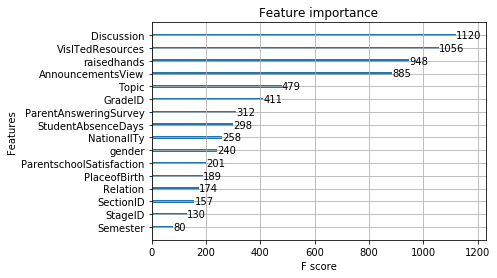

In [38]:
y_train = label.fit_transform(y_train)
xgb = XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=100,seed=10, use_label_encoder=False, disable_default_eval_metric= True)
pred=xgb.fit(x_train, y_train).predict(x_test)
plot_importance(xgb)
plt.show()

From the above plot, we have a good estimate of what features are important. In our application, we'll be obtaining information that might not be the exact copy of this but is similar enough to have the model still work and predict well on it.

To use this data and information in our project, we decided that if we exclude everything except gender, GradeID, raisedhands  VisITedResources, AnnouncementsView, Discussion, ParentAnsweringSurvey and StudentAbsenceDays, our model's accuracy only changes to 79.16%. This percentage is good enough to accurately estimate the performance of students.

But to have **consistent data encoding** across our model's multiple uses, we will be using map function to code the unique values in our dataset and assign them a number. 

In [ ]:
gender_map = {'M':1,
              'F':2}

GradeID_map =   {'G-02':2,
                 'G-08':8,
                 'G-09':9,
                 'G-04':4,
                 'G-05':5,
                 'G-06':6,
                 'G-07':7,
                 'G-12':12,
                 'G-11':11,
                 'G-10':10}

ParentAnsweringSurvey_map = {'Yes':1,
                             'No':0}

StudentAbsenceDays_map = {'Under-7':0,
                          'Above-7':1}

x.gender = x.gender.map(gender_map)
x.StudentAbsenceDays = x.StudentAbsenceDays.map(StudentAbsenceDays_map)
x.ParentAnsweringSurvey = x.ParentAnsweringSurvey.map(ParentAnsweringSurvey_map)
x.GradeID = x.GradeID.map(GradeID_map)

To scale our information to the data we have in our database, we will be substituting features like this:


| Original | Modified |
| --- | --- |
| gender | Gender |
| GradeID | GradeID |
| raisedhands | usedLearn |
| VisITedResources | visitedWebsite |
| AnnouncementsView | usedQuiz |
| Discussion | avgQuizMarks |
| ParentAnsweringSurvery | parentAnsweringSurvey |
| StudentAbsenceDays | noWebsiteActivityDays |


And we are done with our feauture anaylsis and making our regression model. Now we will be saving our moel using **pickle** and using it to create an API that'll fetch data to test for our application.